In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
data = pd.read_csv("Cleveland/heart.csv", delimiter=',')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
data = data.drop(columns='fbs')
data = data.drop(columns='slope')
data = data.drop(columns='oldpeak')
data = data.drop(columns='restecg')
data = data.drop(columns='ca')
data = data.drop(columns='thal')

data.head()

,age,sex,cp,trestbps,chol,thalach,exang,target
0,52,1,0,125,212,168,0,0
1,53,1,0,140,203,155,1,0
2,70,1,0,145,174,125,1,0
3,61,1,0,148,203,161,0,0
4,62,0,0,138,294,106,0,0


In [30]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
thalach     0
exang       0
target      0
dtype: int64

In [31]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(717, 7)
(717,)


In [32]:
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,    
    random_state=42,   
    class_weight="balanced"
)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'trained_model.pkl')
print("Model saved as 'trained_model.pkl'")

# Evaluate and print results (optional)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")


Model saved as 'trained_model.pkl'
Accuracy on test set: 1.00


In [34]:
# Assuming y_train is defined in your training script
print("Training Data Labels:")
print(y_train.value_counts())  # Outputs the counts of each label (0 and 1)

print(y_test.value_counts())

Training Data Labels:
target
1    377
0    340
Name: count, dtype: int64
target
0    159
1    149
Name: count, dtype: int64


In [35]:
# Example of a young, healthy individual
test_case_healthy = pd.DataFrame({
    'age': [25],
    'sex': [1],
    'cp': [0],
    'trestbps': [120],
    'chol': [180],
    'thalach': [190],
    'exang': [0]
})

# Example of an older, unhealthy individual
test_case_risky = pd.DataFrame({
    'age': [70],
    'sex': [1],
    'cp': [3],
    'trestbps': [150],
    'chol': [300],
    'thalach': [100],
    'exang': [1]
})

# Make predictions for both cases
healthy_prediction = model.predict(test_case_healthy)
risky_prediction = model.predict(test_case_risky)

print(f"Healthy Individual Prediction: {healthy_prediction}")
print(f"Risky Individual Prediction: {risky_prediction}")

Healthy Individual Prediction: [1]
Risky Individual Prediction: [0]


In [36]:
# Display feature importance
print("Feature Importance:")
print(pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False))

Feature Importance:
    Feature  Importance
5   thalach    0.222140
2        cp    0.176256
0       age    0.164608
4      chol    0.157094
3  trestbps    0.137181
6     exang    0.081966
1       sex    0.060755


In [37]:
# Extremely low-risk individual
extremely_healthy = pd.DataFrame({
    'age': [20],
    'sex': [1],
    'cp': [0],
    'trestbps': [110],
    'chol': [150],
    'thalach': [200],
    'exang': [0]
})
print(f"Extremely Healthy Prediction: {model.predict(extremely_healthy)}")

# Extremely high-risk individual
extremely_risky = pd.DataFrame({
    'age': [80],
    'sex': [1],
    'cp': [3],
    'trestbps': [180],
    'chol': [400],
    'thalach': [80],
    'exang': [1]
})
print(f"Extremely Risky Prediction: {model.predict(extremely_risky)}")

Extremely Healthy Prediction: [1]
Extremely Risky Prediction: [0]


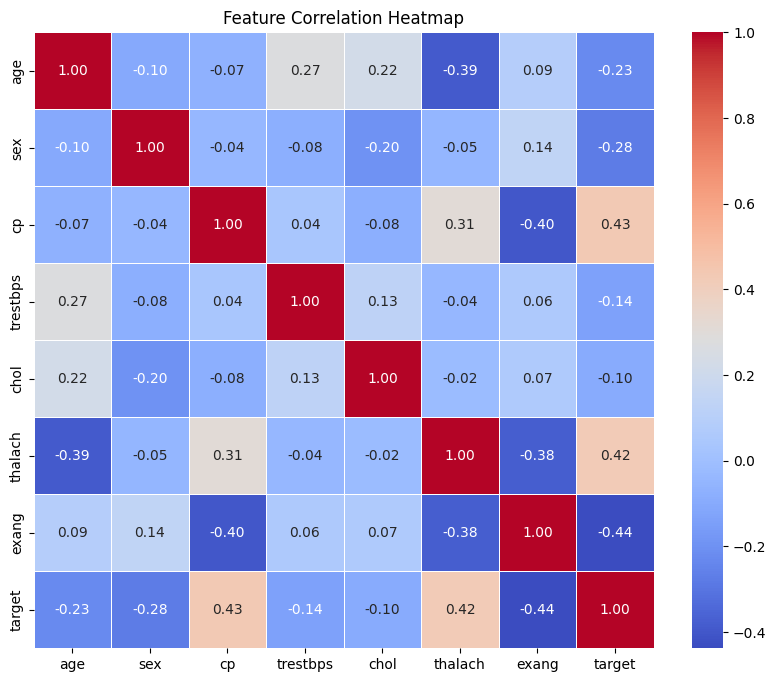

In [40]:
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

